# Earthquake predictions in Mexico (Exploratory Data Analysis)

In this step we will analyze more deeply the information we obtained from cleaning our original dataset on ~50 years of earthquakes history in Mexico (1970 - 2021). 

We will try to identify which features are more important in our prediction, and also, what kind of relationship each one of them has with the rest.

The first step is to load all the information that we obtained during the data wrangling.

In [1]:
#First, we import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from library.sb_utils import save_file
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

After importing all the necessary libraries, let's open our main dataframe that was cleaned during the data wrangling step.

In [2]:
quakes_data = pd.read_csv('../derived_data/quakes_data_cleaned.csv')
quakes_data.drop(columns=['Unnamed: 0'], inplace=True)
quakes_data['Date_Time'] = pd.to_datetime(quakes_data.Date_Time)
quakes_data.head()

,Date_Time,Year,Month,Day,Magnitude,Latitude,Longitude,Depth,Location reference,State
0,1970-02-03 23:08:50,1970,2,3,6.6,15.524,-99.493,21.0,"141 km al SUR de SAN MARCOS, GRO",GRO
1,1970-04-29 08:01:34,1970,4,29,7.3,14.463,-92.683,44.0,"62 km al SUROESTE de CD HIDALGO, CHIS",CHIS
2,1970-04-30 02:32:58,1970,4,30,6.5,14.608,-93.260,22.0,"100 km al SUROESTE de MAPASTEPEC, CHIS",CHIS
3,1971-09-30 02:18:00,1971,9,30,6.5,26.880,-110.800,14.0,"92 km al SUROESTE de PUEBLO YAQUI, SON",SON
4,1972-10-20 02:17:46,1972,10,20,6.6,18.700,-106.756,10.0,"238 km al OESTE de CIHUATLAN, JAL",JAL


In [3]:
quakes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39937 entries, 0 to 39936
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Time           39937 non-null  datetime64[ns]
 1   Year                39937 non-null  int64         
 2   Month               39937 non-null  int64         
 3   Day                 39937 non-null  int64         
 4   Magnitude           39937 non-null  float64       
 5   Latitude            39937 non-null  float64       
 6   Longitude           39937 non-null  float64       
 7   Depth               39937 non-null  float64       
 8   Location reference  39937 non-null  object        
 9   State               39937 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 3.0+ MB


First, we will take a look at how is the distribution of the earthquakes in terms of longitude and latitude. Let's indicate the magnitude of the event using a color scale.

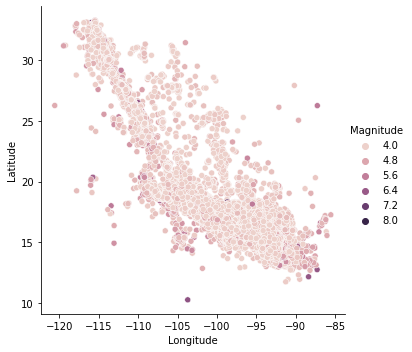

In [4]:
_ = sns.relplot(x="Longitude", y="Latitude", hue='Magnitude', data=quakes_data)
plt.show()

Perhaps it would be better to show this information in a map for better visualization and be able to locate better the areas with bigger history of events.

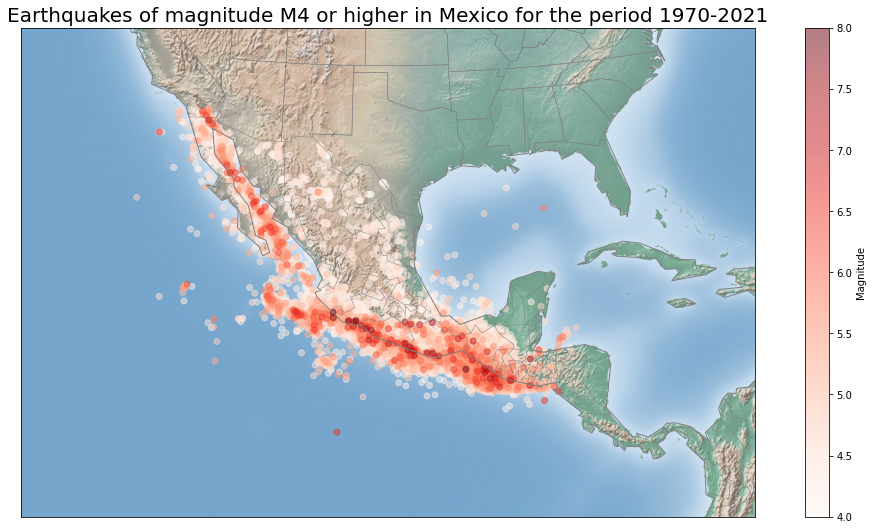

In [5]:
#First let's sort the data by magnitude ascending so the overlapping points with higher values show on top
mag_sort = quakes_data.sort_values(by='Magnitude')

#Then we make the map and scatterplot to show all the history of earthquakes that we have in our data
fig = plt.figure(figsize=(18, 9))
m = Basemap(projection='lcc', 
            lat_0=22,lon_0=-100,
            width=0.6E7, height=0.4E7)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

x=list(mag_sort['Longitude'])
y=list(mag_sort['Latitude'])

_ = m.scatter(x, y, latlon=True,
          c=mag_sort['Magnitude'], cmap='Reds', alpha=0.5)

_ = plt.colorbar(label='Magnitude')
_ = plt.clim(4, 8)
_ = plt.title('Earthquakes of magnitude M4 or higher in Mexico for the period 1970-2021', fontsize=20)
plt.show()

The illustration above give us a general idea of the distribution of the history of events. Mainly we observe that the greater part of the earthquakes have occurred in the pacific coast, especially in the south of the country. Not only this, but also, the biggest earthquakes have happened in this area too.<br><br>
As we can see in the following map __(Fig.1)__, Mexico is located on top of the very big North American plate. Additionally, Rivera and Cocos plates are in constant contact with it, which can potentially generate stronger and more often events.<br><br>
Perhaps it would be a good idea to add a new categorical feature indicating if there is a plate (without considering the North American plate) near the location of each event.

<img src="../images/Tectonic_plates.png" width="600" height="540" align="center"/>
<center><b>Fig. 1</b><br></center><center>Reference SSN: <br><i>https://www.researchgate.net/figure/Tectonic-plates-that-determine-the-seismicity-in-Mexico-Adapted-from-SSN-2020a_fig1_342570590<i></center>

Now let's look at the relation that our features may have.

In [6]:
#Let's make a subset containing only events with magnitude higher than M6.0.
big = quakes_data[quakes_data['Magnitude']>=6.0]

In [7]:
#let's make an additional dataframe containing only numerical columns
numerical_cols = quakes_data[['Magnitude', 'Latitude', 'Longitude', 'Depth', 'Year', 'Month', 'Day']]
numerical_cols.head()

,Magnitude,Latitude,Longitude,Depth,Year,Month,Day
0,6.6,15.524,-99.493,21.0,1970,2,3
1,7.3,14.463,-92.683,44.0,1970,4,29
2,6.5,14.608,-93.260,22.0,1970,4,30
3,6.5,26.880,-110.800,14.0,1971,9,30
4,6.6,18.700,-106.756,10.0,1972,10,20


Now we make a joint plot to see what is the relationship between Magnitude and Depth of the events.

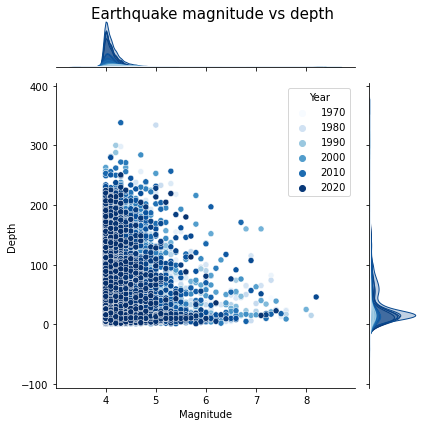

In [8]:
graph = sns.jointplot(x="Magnitude", y="Depth", data=numerical_cols, hue='Year', palette='Blues')
_ = plt.suptitle('Earthquake magnitude vs depth', size=15)
graph.fig.tight_layout()
graph.fig.subplots_adjust(top=0.95)
plt.show()

As we can see, there seems to be a negative correlation between Magnitude and Depth, which indicates that normally earthquakes with higher magnitude occur closer to the surface. This seems logical if we consider an earthquake which has its source closer to the surface will have a bigger impact than one (with the same magnitude) further from it.

Now let's check if other features have important relationships among them.

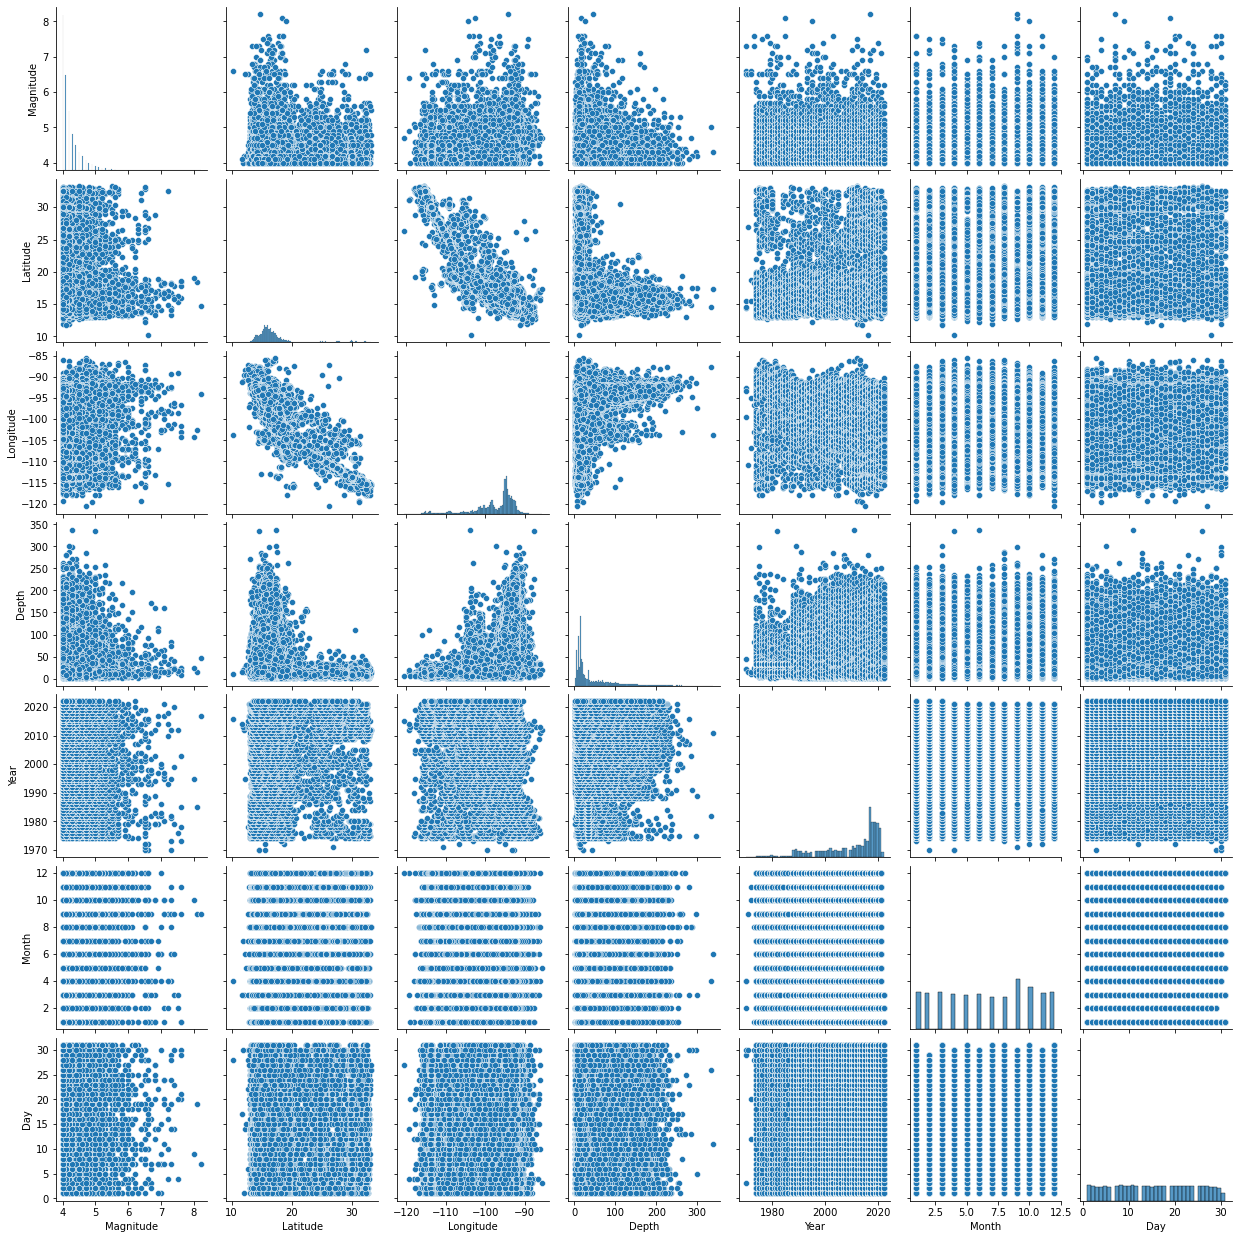

In [9]:
#We make a pairplot for our numerical data
_ = sns.pairplot(numerical_cols)
plt.show()

From the plots above we can conclude the following&colon;<br><br>
    &nbsp;&nbsp;&nbsp;a) Stronger earthquakes in magnitude, occur (in general) closer to the surface (lower value of depth)<br>
    &nbsp;&nbsp;&nbsp;b) Deeper earthquakes occur more frequently in the south of the country and also in the ground surface rather than the ocean<br>
    &nbsp;&nbsp;&nbsp;c) The amount of deeper earthquakes have increased in the past two decades<br>
    &nbsp;&nbsp;&nbsp;d) Stronger earthquakes in magnitude apparently occur more frequently in autumn season<br>

Let's make a heatmap to try to visualize the above results better and check if we can find correlation between the features

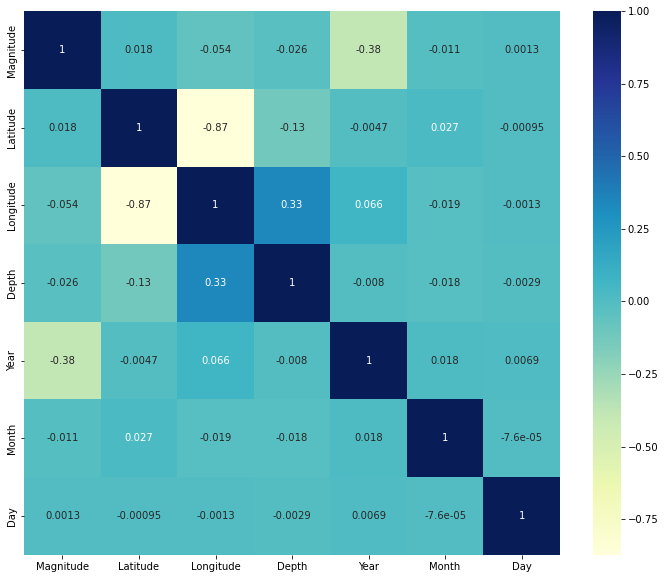

In [10]:
# Make a heatmap of the data 
_ = plt.figure(figsize=(12,10))
_ = sns.heatmap(numerical_cols.corr(), annot=True, cmap="YlGnBu")
plt.show()

With the above heatmap we can confirm that there is some correlation between depth and coordinates of the event. Also, we can notice some negative correlation between magnitude and year. It seems that stronger earthquakes happened more frequently in the earlier years. Let's check if this is really the case.

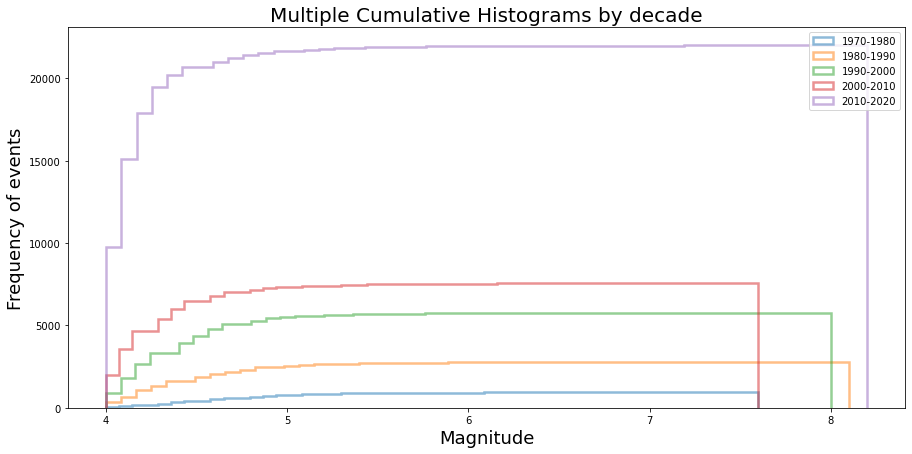

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(1970, 2020, 10):
    plt.hist(x='Magnitude',
         data=quakes_data.loc[(quakes_data['Year'] >= i) & (quakes_data['Year'] <= i+10)], 
         bins=50, alpha=0.5, label=f'{i}-{i+10}', histtype='step', cumulative=True, linewidth=2.5)
    _ = plt.xlabel('Magnitude', size=18)
    _ = plt.ylabel('Frequency of events', size=18)
    _ = plt.title('Multiple Cumulative Histograms by decade', size=20)
    _ = plt.legend(loc='upper right')

Here we can see very clearly that the amount of events has increased every decade since 1970. So the negative correlation between magnitude and year that we saw earlier might be due to this frequency increase in time.

Now let's focus our attention on stronger earthquakes (greater than M6.0) and try to check if there is any relationship with time or location.

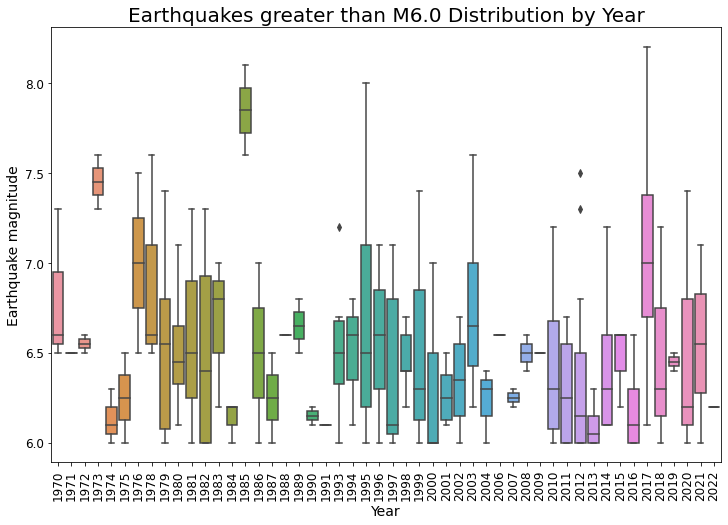

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
_ = sns.boxplot(x='Year', y='Magnitude', data=big)
_ = plt.yticks(fontsize=12)
_ = plt.xticks(rotation='vertical', fontsize=12)
_ = plt.title('Earthquakes greater than M6.0 Distribution by Year', size=20)
_ = plt.ylabel('Earthquake magnitude', size=14)
_ = plt.xlabel('Year', size=14);

We see that 1985, 1995 and 2017 were the years with the strongest earthquakes in the last 50 years. Also we can notice that 1995 and 2017 are the years with more variation and a distribution positively skewed.

Let's take a look now at a boxplot for each of the months.

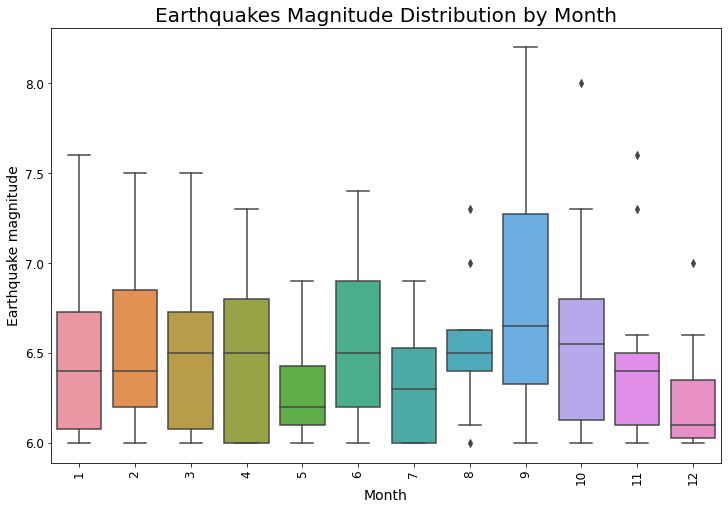

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
_ = sns.boxplot(x='Month', y='Magnitude', data=big)
_ = plt.yticks(fontsize=12)
_ = plt.xticks(rotation='vertical', fontsize=12)
_ = plt.title('Earthquakes Magnitude Distribution by Month', size=20)
_ = plt.ylabel('Earthquake magnitude', size=14)
_ = plt.xlabel('Month', size=14);

It looks like there is a tendency to have stronger events on september and october. Also, it is interesting to see that the month with the biggest variation is september.

Let's dig a litte deeper and see how these three years (1985, 1995 and 2017) relate to each other.

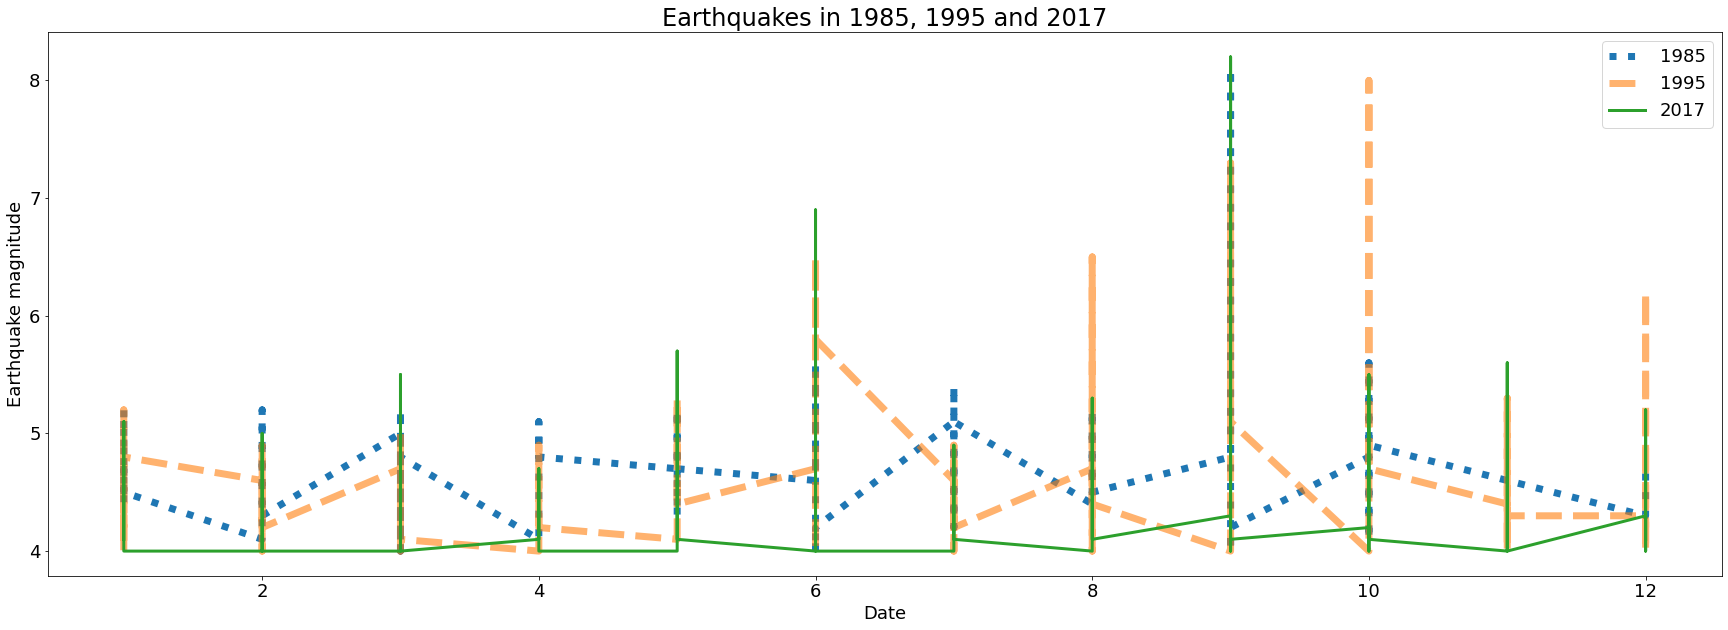

In [14]:
#We make a line plot in the same figure, for every of the 3 years mentioned above. 
fig, ax = plt.subplots(figsize=(30,10))
_ = plt.plot('Month', 'Magnitude', data=quakes_data[quakes_data['Year'] == 1985], linestyle='dotted', linewidth= 7, label=1985)
_ = plt.plot('Month', 'Magnitude', data=quakes_data[quakes_data['Year'] == 1995], linestyle='dashed', linewidth= 7, label=1995, alpha=0.6)
_ = plt.plot('Month', 'Magnitude', data=quakes_data[quakes_data['Year'] == 2017], linewidth= 3, label=2017)
_ = plt.title(f'Earthquakes in 1985, 1995 and 2017', size=24)
_ = plt.ylabel('Earthquake magnitude', size=18)
_ = plt.xlabel('Date', size=18)
_ = plt.yticks(size=18)
_ = plt.xticks(size=18)
_ = plt.legend(loc='upper right', fontsize=18)
plt.show()

When we analyze the above graph we can conclude the following&colon;<br><br>
&nbsp;&nbsp;&nbsp;a) All three years have a similar tendency. They all seem to have a slow increment in magnitude on the events during the first semester. Then, they go down in July and increase again, until they hit the peak for each year in similar months.<br><br>
&nbsp;&nbsp;&nbsp;b) The peaks in 1985 and 2017 occurred in September and the peak in 1995 was in October. It seems that in 1995 the increment lasted for a few more weeks.<br>    

Now let's check which locations have more events and what is their behaviour, especially in 1985, 1995 and 2017.

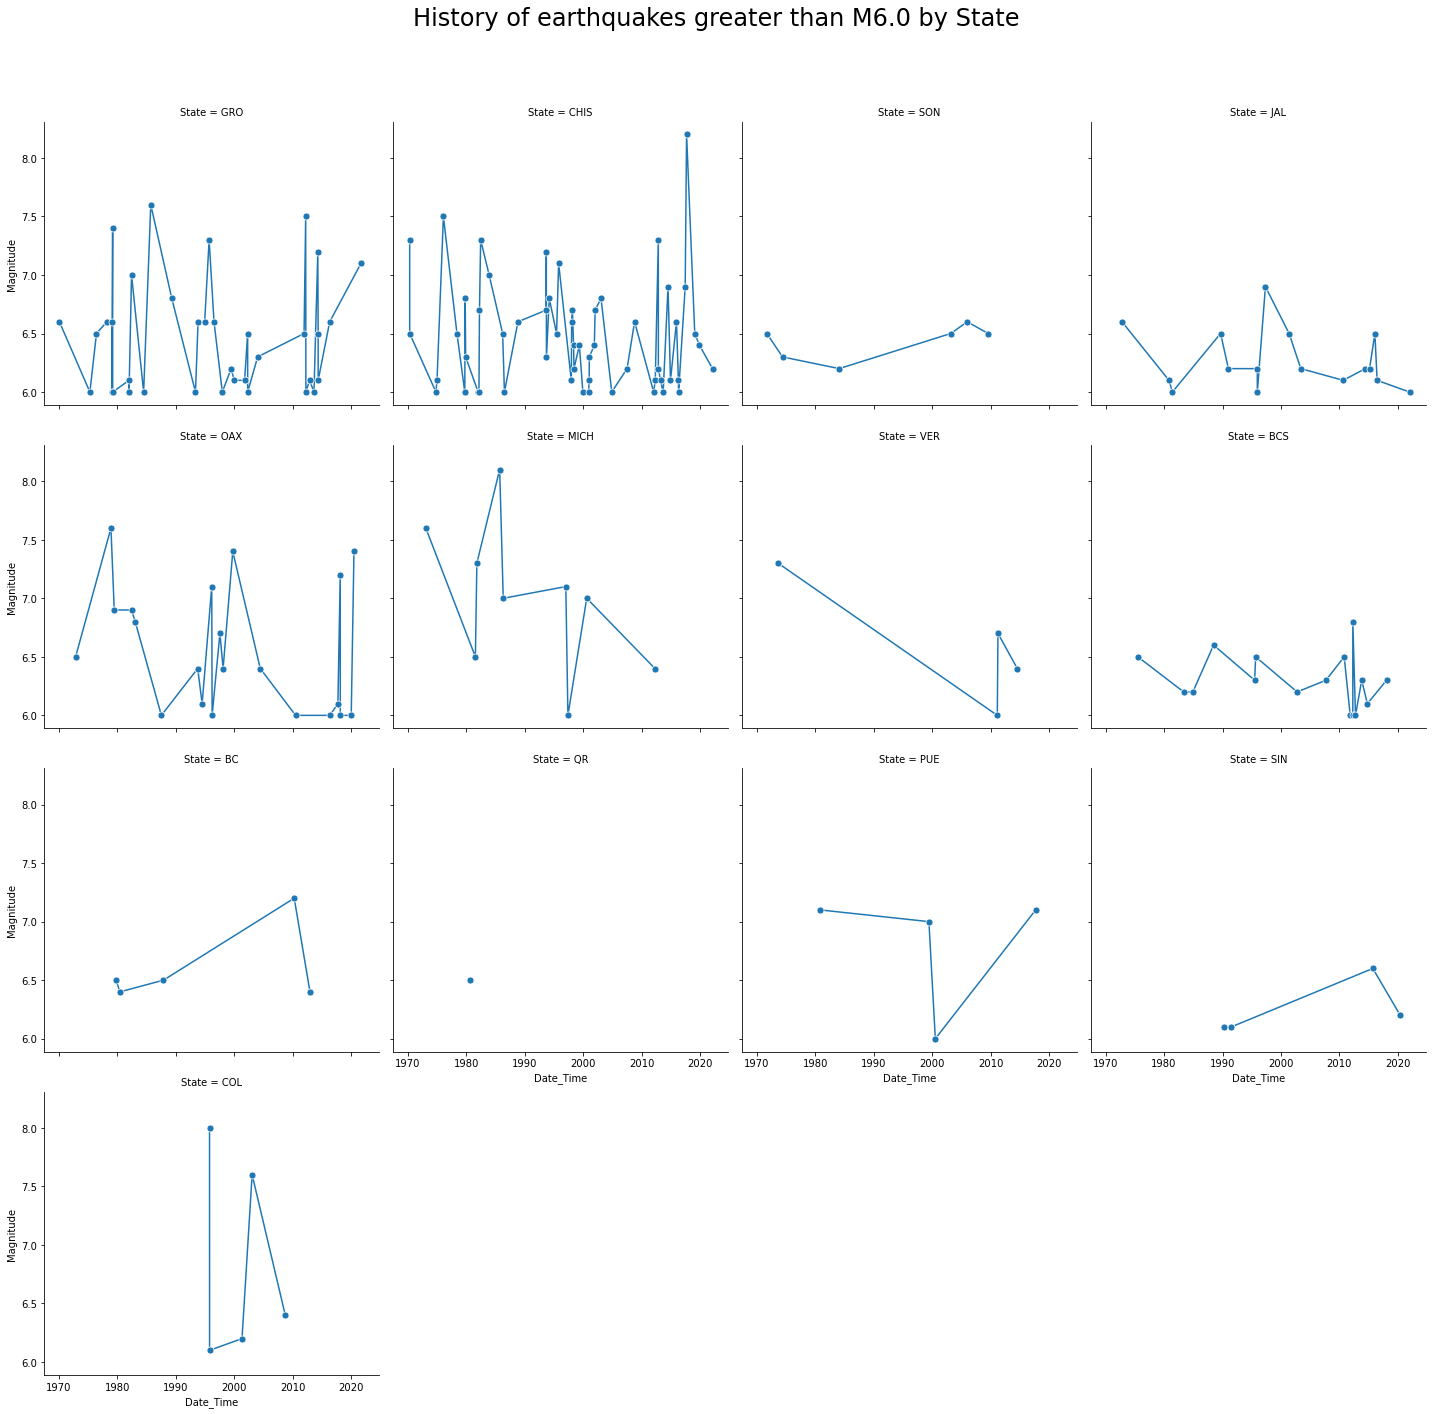

In [15]:
#Let's make a plot for every state showing the history of big earthquakes (>M6.0)
graph = sns.relplot(x='Date_Time', y='Magnitude', data=big, col='State', kind='line', 
                    col_wrap=4, marker='o', markersize=7, linewidth=1.5)
_ = plt.suptitle('History of earthquakes greater than M6.0 by State', size=24)
graph.fig.tight_layout()
graph.fig.subplots_adjust(top=0.9)
plt.show()

We can see that there are mainly 4 states which have more events and also higher in magnitude. We can also notice that there is a fifth state (COL) which only has 5 events in history, but 2 of them are very big.

Taking the previous information into account, let's plot the history of events (regardless of magnitude) for those 5 states, but now considering only 3 different years that we analyzed before (1985, 1995 and 2017).

In [16]:
#Let's make another subset called pacific_coast which inlcudes only the 5 states that we are interested in.
pacific_coast = quakes_data[quakes_data['State'].isin(['MICH', 'COL', 'GRO', 'OAX', 'CHIS'])]

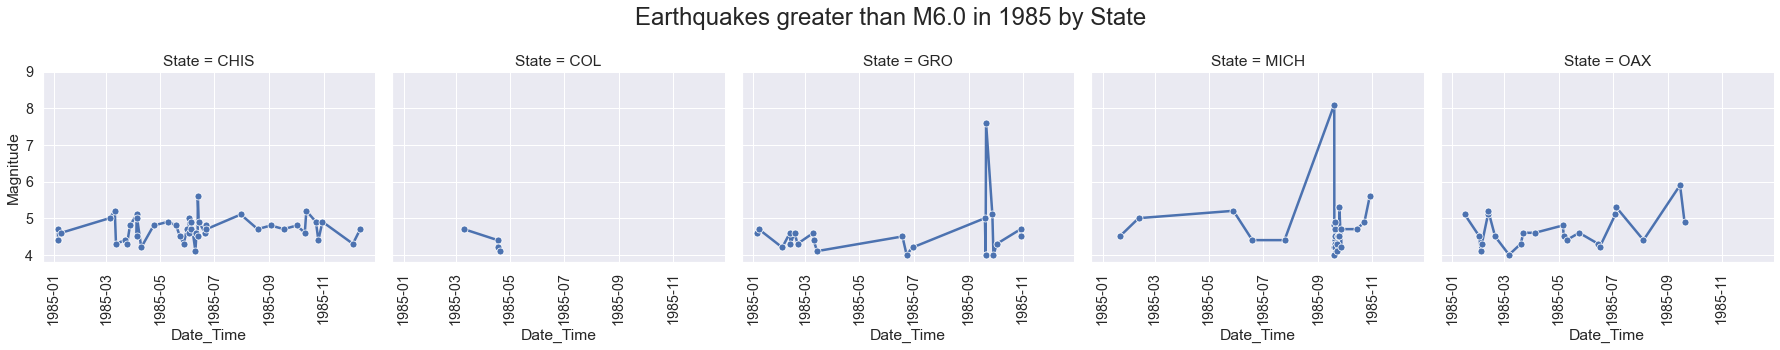

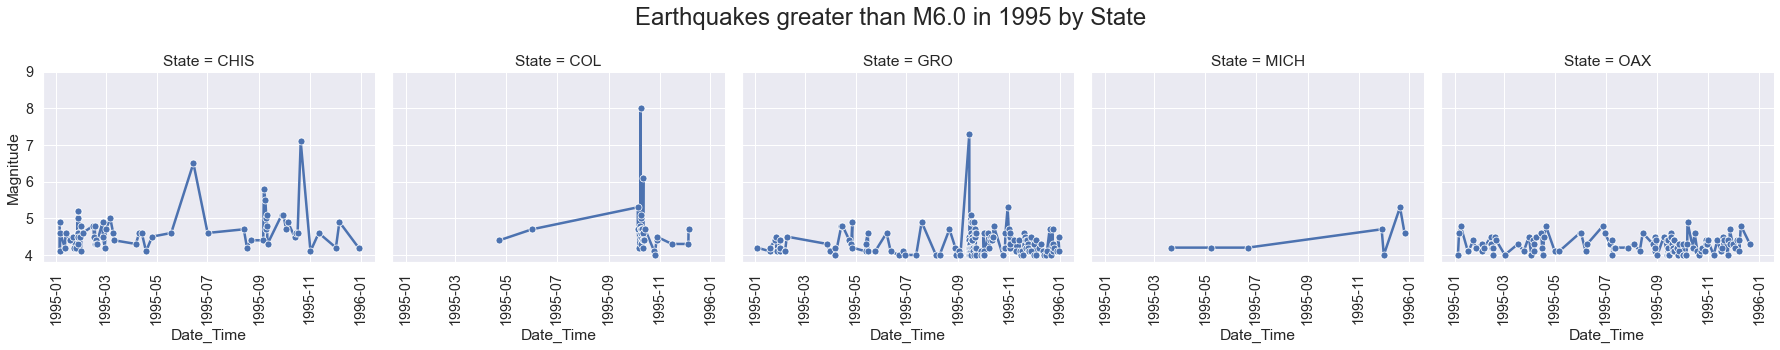

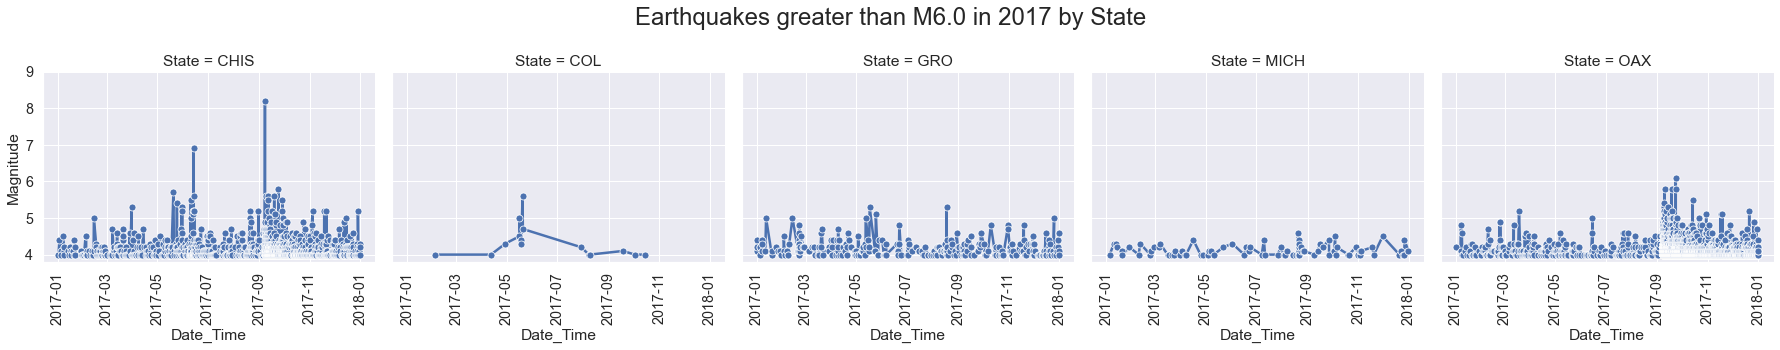

In [17]:
#Now let's take a look at the history of these 5 states in the mentioned years.
sns.set(font_scale=1.3)
yrs = [1985, 1995, 2017]
for yr in yrs:
    graph = sns.relplot(x='Date_Time', y='Magnitude', 
                        data=pacific_coast.loc[(pacific_coast['Year'] == yr)].sort_values(by='State'), 
                        kind='line', col='State', marker='o', markersize=7, linewidth=2.5)
    _ = plt.suptitle(f'Earthquakes greater than M6.0 in {yr} by State', size=24)
    graph.set_xticklabels(rotation = 90)
    _ = plt.yticks(np.arange(4, 10, 1))
    graph.fig.tight_layout()
    graph.fig.subplots_adjust(top=0.8)
    plt.show()

In the previous plots we can notice that for most of the states, 1985 was a year with stronger earthquakes (in general), although that was the year with less events from the analyzed period.
On the other hand, another interesting thing to notice is that for all the states the amount of events increased considerably with time.

Finally, it seems that Chiapas state (CHIS) is the state with the most events and higher in Magnitude.

The following map (Fig. 2) shows the area of the 5 states that we showed in the previous plots. This is the most important area to consider as we thought at the beginning of this notebook.

<img src="../images/area.png" width="720" height="720" align="center"/>
<center><b>Fig. 2</b><br></center><center>Reference Google Earth: <br><i>https://google-earth-pro.gosur.com/<i></center>

__In conclusion&colon;__

As we have seen in this analysis, there are 5 main states to be considered in the scope of events.
Additionally, we were able to identify some yearly trends by analyzing 3 different periods. 
Finally, it is important to remember that, in general, stronger earthquakes happen closer to the continental area and also closer to the surface. Interestingly, main events seem to happen during the autumn season.

Now let's continue with the next step of the analyisis.